In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
data_folder = Path("/Users/djnav/OneDrive/Documentos/GitHub/SPWLA_2021_Geolatinas/dataset/separated_wells/test")
well_101_file = data_folder / "well_101.csv"
well_101 = pd.read_csv(well_101_file)

In [3]:
well_101.describe()

,Unnamed: 0,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
count,2646.00000,2646.0,2646.000000,2235.000000,0.0,2646.000000,2646.000000,2564.000000,2564.000000,2646.000000,2646.000000,2564.000000,2569.000000,2569.000000,0.0
mean,4385.50000,101.0,10838.750000,81.946192,NaN,8.610544,8.806219,2.373807,0.027053,68.306811,0.206400,3.614540,51.878777,45.352623,NaN
std,763.97873,0.0,381.989365,7.316086,NaN,0.634408,0.114656,0.133704,0.024818,21.145823,0.040637,1.112996,280.508822,224.841541,NaN
min,3063.00000,101.0,10177.500000,52.458300,NaN,8.500000,8.603750,2.141685,-0.024779,22.136200,0.086614,2.110590,0.248046,0.290545,NaN
25%,3724.25000,101.0,10508.125000,77.338850,NaN,8.500000,8.712293,2.257303,0.008202,55.409250,0.179857,2.834660,1.213440,1.147180,NaN
50%,4385.50000,101.0,10838.750000,82.518800,NaN,8.500000,8.792335,2.364574,0.022682,66.987700,0.203165,3.419484,2.128280,2.005260,NaN
75%,5046.75000,101.0,11169.375000,87.120700,NaN,8.500000,8.882722,2.476275,0.039426,83.949175,0.229873,4.026715,31.768700,28.751600,NaN
max,5708.00000,101.0,11500.000000,100.459000,NaN,12.250000,9.314860,3.013131,0.164912,147.911000,0.466158,11.747990,5000.000000,5000.000000,NaN


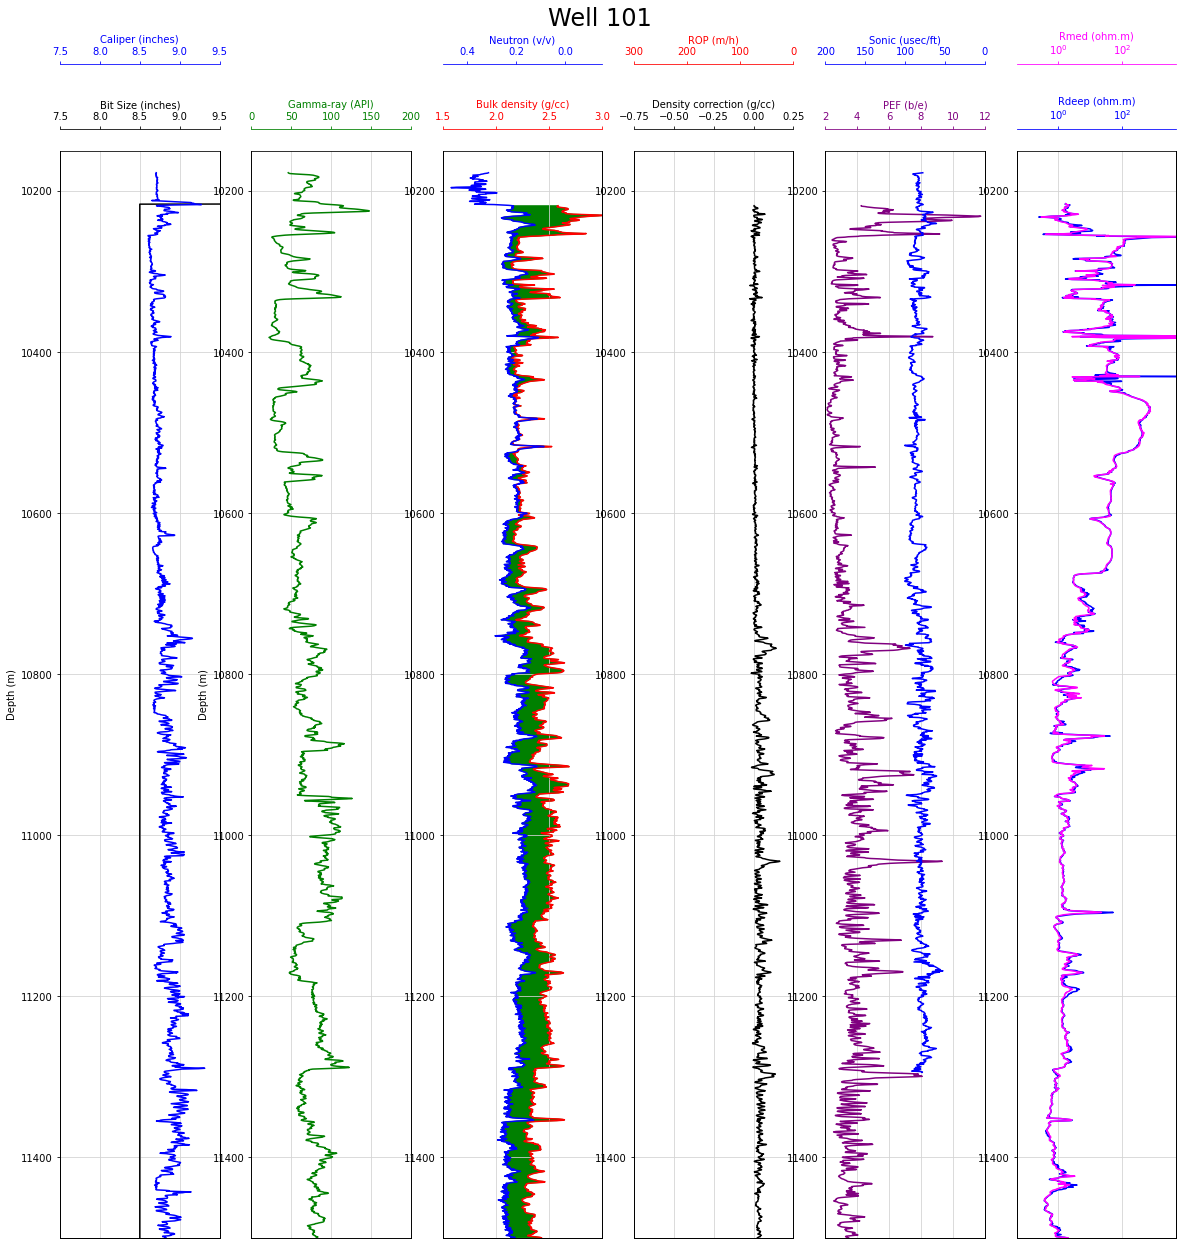

In [5]:
fig, ax = plt.subplots(figsize=(20,20))

#Set up the plot axes
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1) # Bit Size
ax3 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1) # Gamma-ray
ax4 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1) # Density
ax6 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1) # Density correction
ax8 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1) # PEF
ax10 = plt.subplot2grid((1,6), (0,5), rowspan=1, colspan = 1) # Deep resistivity
ax2 = ax1.twiny() #Twins the y-axis for the bit size track with the caliper track, it creates a twin Axes sharing the yaxis.
ax5 = ax4.twiny() #Twins the y-axis for the density track with the neutron track, it creates a twin Axes sharing the yaxis.
ax7 = ax6.twiny() #Twins the y-axis for the ROP with the density correcction track, it creates a twin Axes sharing the yaxis.
ax9 = ax8.twiny() #Twins the y-axis for the sonic track with the PEF track, it creates a twin Axes sharing the yaxis.
ax11 = ax10.twiny() #Twins the y-axis for the deep resistivity track with the medium resistivity track, it creates a twin Axes sharing the yaxis.

#Title of well logs plot
plt.suptitle("Well 101", fontsize=24)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax12 = ax1.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax3.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax4.twiny()
ax14.xaxis.set_visible(False)
ax15 = ax6.twiny()
ax15.xaxis.set_visible(False)
ax16 = ax8.twiny()
ax16.xaxis.set_visible(False)
ax17 = ax10.twiny()
ax17.xaxis.set_visible(False)

# Bit Size track
ax1.plot("BS", "DEPTH", data = well_101, color = "black")
ax1.set_xlabel("Bit Size (inches)")
ax1.xaxis.label.set_color("black")
ax1.set_xlim(7.5, 9.5)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.title.set_color('black')
ax1.set_xticks([7.5, 8, 8.5, 9, 9.5])

# Caliper placed ontop of Bit Size track
ax2.plot("CALI", "DEPTH", data = well_101, color = "blue")
ax2.set_xlabel("Caliper (inches)")
ax2.xaxis.label.set_color("blue")
ax2.set_xlim(7.5, 9.5)
ax2.set_ylim(11500, 10150)
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_position(("axes", 1.08))
ax2.spines["top"].set_visible(True)
ax2.spines["top"].set_edgecolor("blue")
ax2.set_xticks([7.5, 8, 8.5, 9, 9.5])

# Gamma Ray track
ax3.plot("GR", "DEPTH", data = well_101, color = "green")
ax3.set_xlabel("Gamma-ray (API)")
ax3.xaxis.label.set_color("green")
ax3.set_xlim(0, 200)
ax3.set_ylabel("Depth (m)")
ax3.tick_params(axis='x', colors="green")
ax3.spines["top"].set_edgecolor("green")
ax3.title.set_color('green')
ax3.set_xticks([0, 50, 100, 150, 200])

# Density track
ax4.plot("DEN", "DEPTH", data = well_101, color = "red")
ax4.set_xlabel("Bulk density (g/cc)")
ax4.set_xlim(1.5, 3)
ax4.xaxis.label.set_color("red")
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
#ax4.set_xticks([1.9, 2.175, 2.45, 2.725, 3])

# Neutron track placed ontop of density track
ax5.plot("NEU", "DEPTH", data = well_101, color = "blue")
ax5.set_xlabel("Neutron (v/v)")
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.5, -0.15)
ax5.set_ylim(11500, 10150)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
#ax5.set_xticks([0.45, 0.3, 0.15,0, -0.15])

#Shading in Density-Neutron crossplot
x4=well_101['DEN']
x5=well_101['NEU']

x = np.array(ax4.get_xlim())
z = np.array(ax5.get_xlim())

nz=((x5-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

ax4.fill_betweenx(well_101['DEPTH'], x4, nz, where=x4>=nz, interpolate=True, color='green')
ax4.fill_betweenx(well_101['DEPTH'], x4, nz, where=x4<=nz, interpolate=True, color='yellow')

# Density correction track
ax6.plot("DENC", "DEPTH", data = well_101, color = "black")
ax6.set_xlabel("Density correction (g/cc)")
ax6.set_xlim(-0.75, 0.25)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.set_xticks([-0.75, -0.5, -0.25, 0, 0.25])

# ROP track placed ontop of density correction track
ax7.plot("ROP", "DEPTH", data = well_101, color = "red")
ax7.set_xlabel("ROP (m/h)")
ax7.xaxis.label.set_color("red")
ax7.set_xlim(300, 0)
ax7.set_ylim(11500, 10150)
ax7.tick_params(axis='x', colors="red")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.spines["top"].set_edgecolor("red")
#ax7.set_xticks([250, 200, 150, 100, 50, 0])

# PEF track
ax8.plot("PEF", "DEPTH", data = well_101, color = "purple")
ax8.set_xlabel("PEF (b/e)")
ax8.set_xlim(2, 12)
ax8.xaxis.label.set_color("purple")
ax8.tick_params(axis='x', colors="purple")
ax8.spines["top"].set_edgecolor("purple")
ax8.set_xticks([2, 4, 6, 8, 10, 12])

# Sonic track placed ontop of PEF track
ax9.plot("DTC", "DEPTH", data = well_101, color = "blue")
ax9.set_xlabel("Sonic (usec/ft)")
ax9.xaxis.label.set_color("blue")
ax9.set_xlim(200, 0)
ax9.set_ylim(11500, 10150)
ax9.tick_params(axis='x', colors="blue")
ax9.spines["top"].set_position(("axes", 1.08))
ax9.spines["top"].set_visible(True)
ax9.spines["top"].set_edgecolor("blue")
ax9.set_xticks([200, 150, 100, 50, 0])

# Deep resistivity track
ax10.plot("RDEP", "DEPTH", data = well_101, color = "blue")
ax10.set_xlabel("Rdeep (ohm.m)")
ax10.xaxis.label.set_color("blue")
ax10.set_xlim(0.05, 5000)
ax10.tick_params(axis='x', colors="blue")
ax10.spines["top"].set_edgecolor("blue")
ax10.title.set_color('blue')
ax10.semilogx()

# Medium resistivity track placed ontop of Deep resistivity track
ax11.plot("RMED", "DEPTH", data = well_101, color = "magenta")
ax11.set_xlabel("Rmed (ohm.m)")
ax11.xaxis.label.set_color("magenta")
ax11.set_xlim(0.05, 5000)
ax11.set_ylim(11500, 10150)
ax11.tick_params(axis='x', colors="magenta")
ax11.spines["top"].set_position(("axes", 1.08))
ax11.spines["top"].set_visible(True)
ax11.spines["top"].set_edgecolor("magenta")
ax11.semilogx()

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax3, ax4, ax6, ax8, ax10]:
    ax.set_ylim(11500, 10150)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))

#plt.savefig('well_0.png')